In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings

# Suppress specific warnings related to TensorFlow deprecations
warnings.filterwarnings("ignore", category=DeprecationWarning, module="tensorflow")

# Define file paths for data
data_dir = 'Test'


In [2]:

# Get the list of classes dynamically
import os
classes = os.listdir(data_dir)

# Create ImageDataGenerator for data augmentation and normalization
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.3)

# Load and split the data into training, validation, and testing sets
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    classes=classes,
    batch_size=32,
    shuffle=True,
    subset='training'
)
val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    classes=classes,
    batch_size=32,
    shuffle=False,  # Do not shuffle the validation set
    subset='validation'
)


Found 1162 images belonging to 5 classes.
Found 494 images belonging to 5 classes.


In [3]:
# Create InceptionV3 model with pre-trained weights
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom head to the base model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dense(len(classes), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
# Define fuzzy logic controller
def fuzzy_logic_controller(epoch):
    # Example fuzzy logic rules to adjust learning rate and epochs
    if epoch == 3:
        learning_rate = 0.001
        num_epochs = 3
    elif epoch == 4:
        learning_rate = 0.002
        num_epochs = 4
    else :
        learning_rate = 0.003
        num_epochs = 2
   

    return learning_rate, num_epochs

# Train the model using fuzzy logic controller for specified epochs
for epoch in [3, 4, 5]:
    learning_rate, num_epochs = fuzzy_logic_controller(epoch)
    model.fit(train_generator, validation_data=val_generator, epochs=num_epochs, verbose=1, steps_per_epoch=2)

Epoch 1/3
2/2 [==============================] - 44s 33s/step - loss: 1.7026 - accuracy: 0.3125 - val_loss: 3.7978 - val_accuracy: 0.3785
Epoch 2/3
2/2 [==============================] - 35s 28s/step - loss: 1.6544 - accuracy: 0.3281 - val_loss: 3.0253 - val_accuracy: 0.1781
Epoch 3/3
2/2 [==============================] - 34s 28s/step - loss: 1.6497 - accuracy: 0.2031 - val_loss: 1.8849 - val_accuracy: 0.3866
Epoch 1/4
2/2 [==============================] - 35s 30s/step - loss: 1.6857 - accuracy: 0.1719 - val_loss: 5.2141 - val_accuracy: 0.3866
Epoch 2/4
2/2 [==============================] - 33s 28s/step - loss: 1.4844 - accuracy: 0.3125 - val_loss: 188.5996 - val_accuracy: 0.3866
Epoch 3/4
2/2 [==============================] - 32s 26s/step - loss: 1.4403 - accuracy: 0.4219 - val_loss: 1101.9476 - val_accuracy: 0.3866
Epoch 4/4
2/2 [==============================] - 34s 27s/step - loss: 1.5265 - accuracy: 0.3125 - val_loss: 1347.8746 - val_accuracy: 0.3866
Epoch 1/2
2/2 [===========

In [5]:
best_num_epochs = 2  # Set the number of epochs to 2
history = model.fit(train_generator, validation_data=val_generator, epochs=best_num_epochs, verbose=1,steps_per_epoch=5)

Epoch 1/2
5/5 [==============================] - 49s 11s/step - loss: 1.4213 - accuracy: 0.3562 - val_loss: 4917.6602 - val_accuracy: 0.3866
Epoch 2/2
5/5 [==============================] - 46s 10s/step - loss: 1.4604 - accuracy: 0.3688 - val_loss: 4500.0151 - val_accuracy: 0.2713


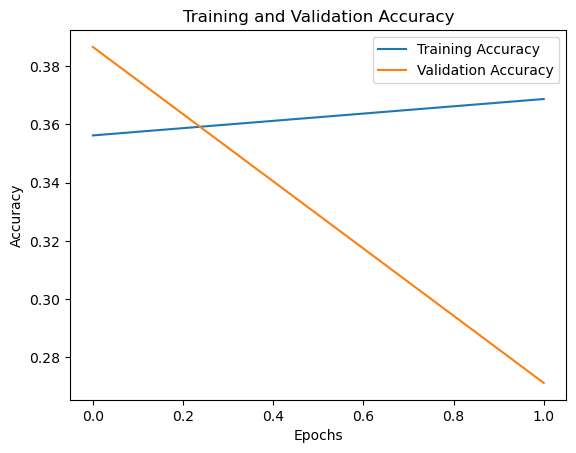

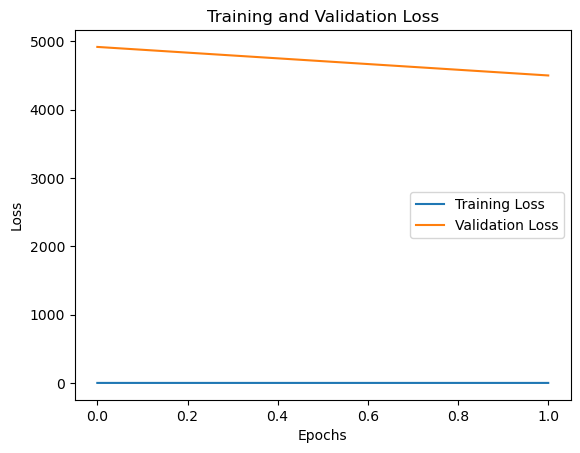

In [6]:
# Plot training and validation accuracy
if 'accuracy' in history.history:
    plt.plot(history.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
if 'loss' in history.history:
    plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [7]:
# Reset the training generator before evaluation
train_generator.reset()
# Evaluate the model on the training set
train_pred_labels = np.argmax(model.predict(train_generator), axis=1)
train_true_labels = train_generator.classes

val_true_labels = val_generator.classes

# Reset the validation generator before evaluation
val_generator.reset()
# Evaluate the model on the validation set
val_pred_labels = np.argmax(model.predict(val_generator), axis=1)
val_true_labels = val_generator.classes

# Calculate confusion matrix for training set
train_confusion_mat = confusion_matrix(train_true_labels, train_pred_labels)

# Calculate classification report and confusion matrix
report = classification_report(val_true_labels, val_pred_labels, target_names=classes, zero_division=1)
confusion_mat = confusion_matrix(val_true_labels, val_pred_labels)

In [8]:
# Print classification report and confusion matrix
print("Classification Report:")
print(report)
print("\nConfusion Matrix:")
print(confusion_mat)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       191
           1       1.00      0.00      0.00        88
           2       0.27      1.00      0.43       134
           3       1.00      0.00      0.00        66
           4       1.00      0.00      0.00        15

    accuracy                           0.27       494
   macro avg       0.85      0.20      0.09       494
weighted avg       0.80      0.27      0.12       494


Confusion Matrix:
[[  0   0 191   0   0]
 [  0   0  88   0   0]
 [  0   0 134   0   0]
 [  0   0  66   0   0]
 [  0   0  15   0   0]]


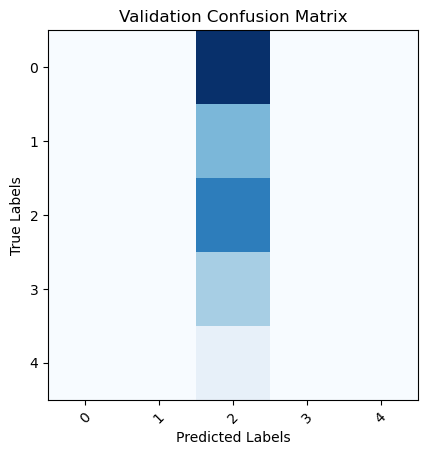

In [9]:
# Plot validation confusion matrix
plt.imshow(confusion_mat, cmap='Blues')
plt.xticks(np.arange(len(classes)), classes, rotation=45)
plt.yticks(np.arange(len(classes)), classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Validation Confusion Matrix')
plt.show()


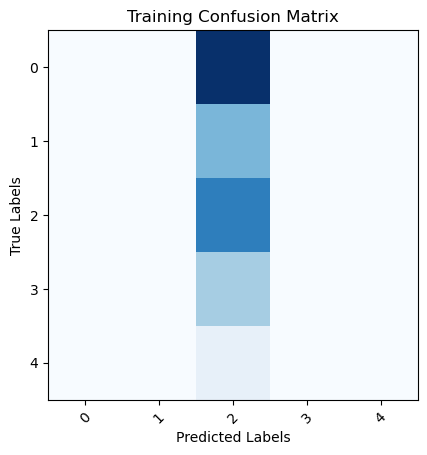

In [10]:
# Plot training confusion matrix
plt.imshow(train_confusion_mat, cmap='Blues')
plt.xticks(np.arange(len(classes)), classes, rotation=45)
plt.yticks(np.arange(len(classes)), classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Training Confusion Matrix')
plt.show()


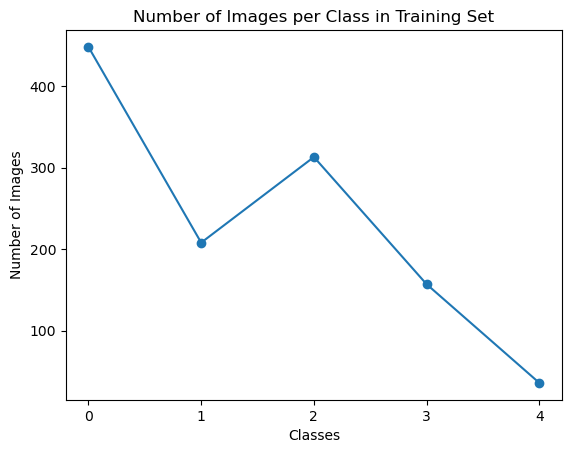

In [11]:
# Count the number of images per class in the training set
num_images_per_class = [sum(train_true_labels == i) for i in range(len(classes))]

# Plot line graph for number of images per class
plt.plot(classes, num_images_per_class, marker='o')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class in Training Set')
plt.show()


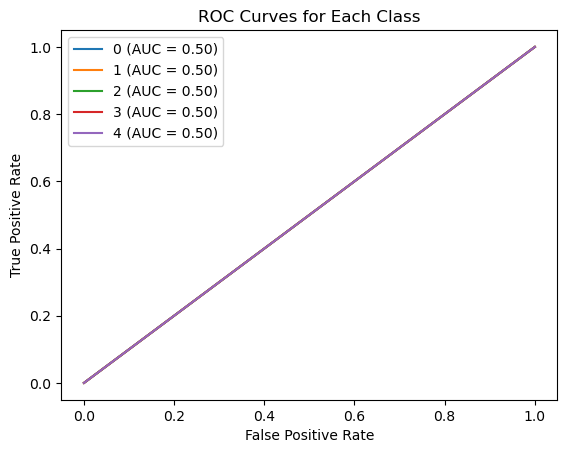

In [12]:
# Calculate ROC curves and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(val_true_labels, model.predict(val_generator)[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'{classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend()
plt.show()

Error Rates for Each Class:
0: 10000.00%
1: 10000.00%
2: 10000.00%
3: 10000.00%
4: 10000.00%


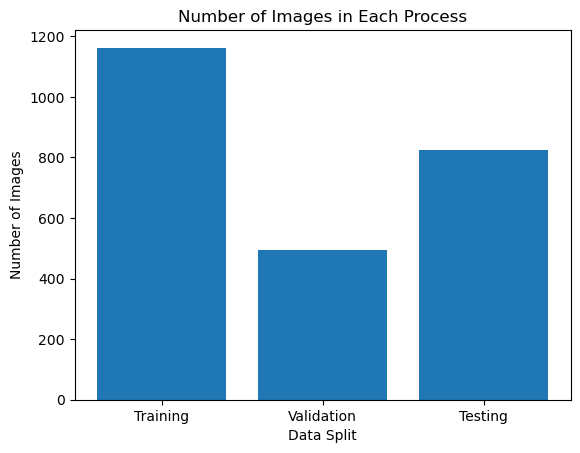

In [18]:
# Calculate error rates for each class
# Calculate error rates for each class
error_rates = [(1 - tpr[i]) * 100 for i in range(len(classes))]  # Convert to percentage

print("Error Rates for Each Class:")
for i, class_name in enumerate(classes):
    print(f"{class_name}: {error_rates[i][0]:.2%}")

# Calculate number of images for each process (training, validation, testing)
num_images_per_process = [len(train_generator.classes), len(val_generator.classes), len(test_generator.classes)]

# Plot bar graph
plt.bar(['Training', 'Validation', 'Testing'], num_images_per_process)
plt.xlabel('Data Split')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Process')
plt.show()

In [17]:
# Print error rates for each class
print("Error Rates for Each Class:")
for i, class_name in enumerate(classes):
    print(f"{class_name}: {error_rates[i][0]*100:.2f}%")



Error Rates for Each Class:
0: 10000.00%
1: 10000.00%
2: 10000.00%
3: 10000.00%
4: 10000.00%


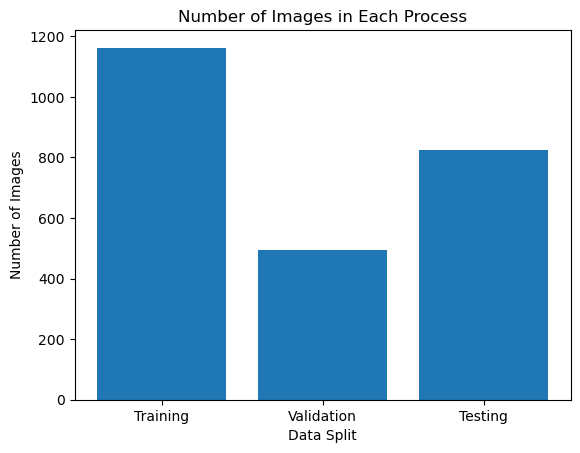

In [16]:
# Calculate the number of images for each process
num_images_per_process = [len(train_generator.classes), len(val_generator.classes), len(test_generator.classes)]

# Plot bar graph
plt.bar(['Training', 'Validation', 'Testing'], num_images_per_process)
plt.xlabel('Data Split')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Process')
plt.show()

Found 826 images belonging to 5 classes.


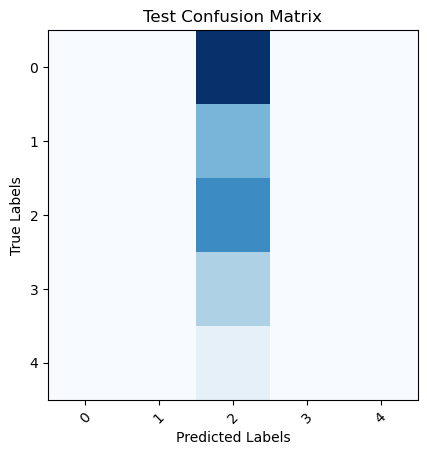

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       328
           1       1.00      0.00      0.00       153
           2       0.26      1.00      0.41       212
           3       1.00      0.00      0.00       106
           4       1.00      0.00      0.00        27

    accuracy                           0.26       826
   macro avg       0.85      0.20      0.08       826
weighted avg       0.81      0.26      0.10       826


Test Confusion Matrix:
[[  0   0 328   0   0]
 [  0   0 153   0   0]
 [  0   0 212   0   0]
 [  0   0 106   0   0]
 [  0   0  27   0   0]]


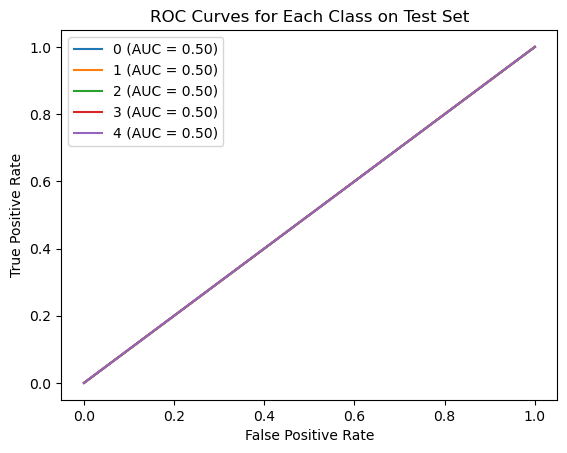

Test Error Rates for Each Class:
0: 100.00%
1: 100.00%
2: 100.00%
3: 100.00%
4: 100.00%


In [15]:
# Create ImageDataGenerator for data normalization (no data augmentation for test set)
# Define file paths for data
test_data_dir = 'val'
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load and create the test generator
test_generator = test_datagen.flow_from_directory(
    test_data_dir,  # Replace with the path to your test data
    target_size=(224, 224),
    classes=classes,
    batch_size=200,
    shuffle=False  # Do not shuffle the test set
)

# Reset the test generator before evaluation
test_generator.reset()

# Evaluate the model on the test set
test_pred_labels = np.argmax(model.predict(test_generator), axis=1)
test_true_labels = test_generator.classes

# Calculate classification report and confusion matrix for the test set
test_report = classification_report(test_true_labels, test_pred_labels, target_names=classes,zero_division=1)
test_confusion_mat = confusion_matrix(test_true_labels, test_pred_labels)

# Plot test confusion matrix
plt.imshow(test_confusion_mat, cmap='Blues')
plt.xticks(np.arange(len(classes)), classes, rotation=45)
plt.yticks(np.arange(len(classes)), classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Test Confusion Matrix')
plt.show()

# Print classification report and confusion matrix for the test set
print("Test Classification Report:")
print(test_report)
print("\nTest Confusion Matrix:")
print(test_confusion_mat)

# Calculate ROC curves and AUC for each class on the test set
test_fpr = dict()
test_tpr = dict()
test_roc_auc = dict()

for i in range(len(classes)):
    test_fpr[i], test_tpr[i], _ = roc_curve(test_true_labels, model.predict(test_generator)[:, i], pos_label=i)
    test_roc_auc[i] = auc(test_fpr[i], test_tpr[i])

# Plot ROC curves for each class on the test set
for i in range(len(classes)):
    plt.plot(test_fpr[i], test_tpr[i], label=f'{classes[i]} (AUC = {test_roc_auc[i]:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class on Test Set')
plt.legend()
plt.show()

# Calculate error rates for each class on the test set
test_error_rates = [1 - test_tpr[i] for i in range(len(classes))]
print("Test Error Rates for Each Class:")
for i, class_name in enumerate(classes):
    print(f"{class_name}: {test_error_rates[i][0]:.2%}")
